# NEXT:
- check unmatched
    - check the type (journal, abstract etc)
- check dubous titles
- get keyfile
- add to bib file
    - add ss_id's to bibfile
    - add ss_doi

## Flowchart
1. match on doi
    - single match = match
    - multiple matches, one with most citations = match
        - NOTE: arxiv could be updated with doi, so citations may originate from the arxiv paper. Check what to do?
2. match on title
    - ss_id has single bibkey match > 80%?
        - Check if multiple ss_ids are linked to this single bibkey
        - Could be that one of these ss_ids are already linked via doi?
    - ss_id has multiple bibkey matches > 80% 
        - check indivually
        - probably arxiv + journal
        - take one with most citations?
        - sum citations?

### Main task: make csv file with ambiguous cases that can be checked manually
should contain:
- ss_id
- bibkey
- Titles

In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df_bib = pd.read_csv('script_data/temp_diag_bib_summary.csv')
df_ss = pd.read_csv('script_data/temp_semantic_scholar_all_staff_id_last_100_summary.csv')
df_doi = pd.read_csv('script_data/temp_doi_match_data.csv')
df_title = pd.read_csv('script_data/temp_title_match_data.csv')

In [3]:
# df_non_string = df_bib[df_bib['type']!='string']
# not_na_doi = df_non_string[df_non_string['type']!='article'][df_non_string[df_non_string['type']!='article']['doi'].notna()]
# from collections import Counter
# counts = Counter(not_na_doi['type'])

In [4]:
# df_ss[df_ss['ss_id'] == 'c70d5169b5c69171cc2ed3ec40eebda0630988d9']

# Matches df
This is the df we want to make complete

In [5]:
df_matches = df_bib[df_bib['type']!='string'][['bibkey']]
df_matches['ss_id'] = len(df_matches)*[np.nan]
df_matches['comment'] = len(df_matches)*[np.nan]
df_matches

,bibkey,ss_id,comment
1065,Abas05,NaN,NaN
1066,Genu22,NaN,NaN
1067,Abas05a,NaN,NaN
1068,Abel19,NaN,NaN
1069,Abra08a,NaN,NaN
...,...,...,...
2782,Graa23,NaN,NaN
2783,Graa22,NaN,NaN
2784,Alves22c,NaN,NaN
2785,Wild23a,NaN,NaN


# BIB SUMMARY

In [6]:
df_bib

,bibkey,type,title,authors,doi,gs_citations,journal
0,AA,string,NaN,NaN,NaN,NaN,NaN
1,AAC,string,NaN,NaN,NaN,NaN,NaN
2,AACC,string,NaN,NaN,NaN,NaN,NaN
3,AAPM,string,NaN,NaN,NaN,NaN,NaN
4,AATC,string,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2782,Graa23,article,MRI image features with an evident relation to...,"van der Graaf, Jasper W and Kroeze, Robert Jan...",10.1007/s00586-023-07602-x,NaN,European Spine Journal
2783,Graa22,conference,Segmentation of vertebrae and intervertebral d...,"van der Graaf, Jasper W and van Hooff, Miranda...",10.1117/12.2611423,NaN,NaN
2784,Alves22c,inproceedings,Uncertainty-Guided Self-learning Framework for...,"Alves, Nat{\'a}lia and de Wilde, Bram",https://doi.org/10.1007/978-3-031-23911-3_11,NaN,NaN
2785,Wild23a,article,Inter-and Intra-Observer Variability and the E...,"de Wilde, Bram and Joosten, Frank and Venderin...",https://doi.org/10.3390/jimaging9030055,NaN,Journal of Imaging


In [7]:
df_bib[df_bib['type']!='string']

,bibkey,type,title,authors,doi,gs_citations,journal
1065,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,10.1016/j.clinph.2005.04.001,233.0,CLINNP
1066,Genu22,conference,Imaging tumor-infiltrating CD8 (+) T-cells in ...,E. A. J. van Genugten and B. Piet and G. Schre...,NaN,NaN,NaN
1067,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,3.0,NaN
1068,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",10.1002/path.5331,24.0,JPAT
1069,Abra08a,article,Evaluation of a system for automatic detection...,M. D. Abr\`amoff and M. Niemeijer and M. S. A....,10.2337/dc07-1312,287.0,DC
...,...,...,...,...,...,...,...
2782,Graa23,article,MRI image features with an evident relation to...,"van der Graaf, Jasper W and Kroeze, Robert Jan...",10.1007/s00586-023-07602-x,NaN,European Spine Journal
2783,Graa22,conference,Segmentation of vertebrae and intervertebral d...,"van der Graaf, Jasper W and van Hooff, Miranda...",10.1117/12.2611423,NaN,NaN
2784,Alves22c,inproceedings,Uncertainty-Guided Self-learning Framework for...,"Alves, Nat{\'a}lia and de Wilde, Bram",https://doi.org/10.1007/978-3-031-23911-3_11,NaN,NaN
2785,Wild23a,article,Inter-and Intra-Observer Variability and the E...,"de Wilde, Bram and Joosten, Frank and Venderin...",https://doi.org/10.3390/jimaging9030055,NaN,Journal of Imaging


In [8]:
df_bib[df_bib['title'].notna()]

,bibkey,type,title,authors,doi,gs_citations,journal
1065,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,10.1016/j.clinph.2005.04.001,233.0,CLINNP
1066,Genu22,conference,Imaging tumor-infiltrating CD8 (+) T-cells in ...,E. A. J. van Genugten and B. Piet and G. Schre...,NaN,NaN,NaN
1067,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,3.0,NaN
1068,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",10.1002/path.5331,24.0,JPAT
1069,Abra08a,article,Evaluation of a system for automatic detection...,M. D. Abr\`amoff and M. Niemeijer and M. S. A....,10.2337/dc07-1312,287.0,DC
...,...,...,...,...,...,...,...
2782,Graa23,article,MRI image features with an evident relation to...,"van der Graaf, Jasper W and Kroeze, Robert Jan...",10.1007/s00586-023-07602-x,NaN,European Spine Journal
2783,Graa22,conference,Segmentation of vertebrae and intervertebral d...,"van der Graaf, Jasper W and van Hooff, Miranda...",10.1117/12.2611423,NaN,NaN
2784,Alves22c,inproceedings,Uncertainty-Guided Self-learning Framework for...,"Alves, Nat{\'a}lia and de Wilde, Bram",https://doi.org/10.1007/978-3-031-23911-3_11,NaN,NaN
2785,Wild23a,article,Inter-and Intra-Observer Variability and the E...,"de Wilde, Bram and Joosten, Frank and Venderin...",https://doi.org/10.3390/jimaging9030055,NaN,Journal of Imaging


# SEMANTIC SCHOLAR SUMMARY

In [10]:
df_ss

,staff_id,ss_id,title,doi,ss_citations
0,8038506,1898998f27ce0750a42f8f3ca2ed7e292f05aee2,Understanding metric-related pitfalls in image...,10.48550/arXiv.2302.01790,5
1,8038506,362c510dec0d566d22d5be3af0519fc7eec8bb86,Uncertainty-Aware Multiple-Instance Learning f...,NaN,0
2,8038506,4bcd672218ecec70473c84f6f1cc52c64031f3e5,Continual learning strategies for cancer-indep...,10.1016/j.media.2023.102755,0
3,8038506,7981606bf8110ec6cc64baa22d694096f7862939,AIROGS: Artificial Intelligence for RObust Gla...,10.48550/arXiv.2302.01738,2
4,8038506,e738d94746b0f33b1c48737022ab186618d4d4cd,SimpleRad: Patient-Friendly Dutch Radiology Re...,10.1007/978-3-031-28241-6_18,0
...,...,...,...,...,...
1107,5752941,7971250a0b35dd47790d09e0c1d1fdcd16c5e802,Future directions in resuscitation care: Towar...,10.1016/J.RESUSCITATION.2018.07.350,0
1108,5752941,3cfe71ef252b69aeaa7d5e70b84afb518e253e82,Ventricular fibrillation waveform characterist...,10.1016/j.resuscitation.2017.03.029,8
1109,5752941,183eca01f54b6aca310e7d68a48a1bd6724745dd,Abstract 19221: Inter Shock Changes of the Ven...,NaN,0
1110,5752941,1b1b6d1c122164f90cecfa7150becf536a99b92d,Abstract 19090: Ventricular Fibrillation Wavef...,NaN,0


# DOI matches

In [22]:
pd.isna(df_doi.iloc[318]['comment'])

False

In [23]:
print(len(df_doi))
df_doi

319


,bibkey,ss_id,comment
0,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,single doi match
1,Amga20,b4c4c3dc91d42114023b0575c3e2273b87446ff7,multiple doi matches ['69999230b02054b82254684...
2,Anto22,979a9f247700d00ff2c3f0612d5eb001379f93c8,multiple doi matches ['979a9f247700d00ff2c3f06...
3,Apru19,0c44949334771d4e331d792bc0db77c7fe708ca2,single doi match
4,Ares19,b3dc561dd990cebc626e10318b8582a198aa3571,single doi match
...,...,...,...
314,Hude20,c52daf1cb971120c4083116cfc213acbaac6faaf,multiple doi matches ['c52daf1cb971120c4083116...
315,Vina22,6df1dd59f69d05d00e0b41b3220781b614584362,single doi match
316,Adam22a,516b2dc6c3761458c8fa6f5759295673e86a42db,single doi match
317,Adam22b,c661857719657aac571718e3d48cb66b8fc1e941,single doi match


In [24]:
df_doi[df_doi['comment'].notna()]['comment'][0]

'single doi match'

In [25]:
df_doi[df_doi['comment'].notna()]['comment'][1]

"multiple doi matches ['69999230b02054b82254684a73bb8a4c83878d28', 'b4c4c3dc91d42114023b0575c3e2273b87446ff7'], took the first one with most citations"

## Example

In [26]:
bibkey = 'Altu20'
ss_id = df_doi[df_doi['bibkey']==bibkey]['ss_id'].item()
display(df_doi[df_doi['bibkey']==bibkey])
display(df_ss[df_ss['ss_id']==ss_id])
display(df_bib[df_bib['bibkey']==bibkey])

,bibkey,ss_id,comment
0,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,single doi match


,staff_id,ss_id,title,doi,ss_citations
144,123637526,90a870cbb9897124193ba18c5358fe45b6260621,Feasibility of end-to-end trainable two-stage ...,10.1117/12.2551331,2
448,2895994,90a870cbb9897124193ba18c5358fe45b6260621,Feasibility of end-to-end trainable two-stage ...,10.1117/12.2551331,2


,bibkey,type,title,authors,doi,gs_citations,journal
1080,Altu20,inproceedings,Feasibility of End-To-End Trainable Two-Stage ...,"Altun, Hidir Cem and Chlebus, Grzegorz and Jac...",10.1117/12.2551331,NaN,NaN


In [27]:
bibkey = 'Amga20'
ss_id = df_doi[df_doi['bibkey']==bibkey]['ss_id'].item()
display(df_doi[df_doi['bibkey']==bibkey])
display(df_ss[df_ss['ss_id']==ss_id])
display(df_bib[df_bib['bibkey']==bibkey])

,bibkey,ss_id,comment
1,Amga20,b4c4c3dc91d42114023b0575c3e2273b87446ff7,multiple doi matches ['69999230b02054b82254684...


,staff_id,ss_id,title,doi,ss_citations
241,143613202,b4c4c3dc91d42114023b0575c3e2273b87446ff7,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,55
615,145441238,b4c4c3dc91d42114023b0575c3e2273b87446ff7,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,55


,bibkey,type,title,authors,doi,gs_citations,journal
1084,Amga20,article,Report on computational assessment of Tumor In...,Mohamed Amgad and and Elisabeth Specht Stovgaa...,10.1038/s41523-020-0154-2,2.0,npj Breast Cancer


In [28]:
df_doi[df_doi['bibkey']==bibkey]['comment'].item()

"multiple doi matches ['69999230b02054b82254684a73bb8a4c83878d28', 'b4c4c3dc91d42114023b0575c3e2273b87446ff7'], took the first one with most citations"

In [29]:
ss_id = '69999230b02054b82254684a73bb8a4c83878d28'
display(df_doi[df_doi['bibkey']==bibkey])
display(df_ss[df_ss['ss_id']==ss_id])
display(df_bib[df_bib['bibkey']==bibkey])

,bibkey,ss_id,comment
1,Amga20,b4c4c3dc91d42114023b0575c3e2273b87446ff7,multiple doi matches ['69999230b02054b82254684...


,staff_id,ss_id,title,doi,ss_citations
235,143613202,69999230b02054b82254684a73bb8a4c83878d28,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,26
611,145441238,69999230b02054b82254684a73bb8a4c83878d28,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,26


,bibkey,type,title,authors,doi,gs_citations,journal
1084,Amga20,article,Report on computational assessment of Tumor In...,Mohamed Amgad and and Elisabeth Specht Stovgaa...,10.1038/s41523-020-0154-2,2.0,npj Breast Cancer


# FILL DF_MATCHES WITH DOI MATCHES

In [19]:
df_matches.loc[df_matches['bibkey'].isin(df_doi['bibkey'])].head()

,bibkey,ss_id,comment
1080,Altu20,NaN,NaN
1084,Amga20,NaN,NaN
1087,Anto22,NaN,NaN
1088,Apru19,NaN,NaN
1093,Ares19,NaN,NaN


In [20]:
df_matches.iloc[df_matches['bibkey'].isin(df_doi['bibkey'])] = df_doi

In [21]:
df_matches[df_matches['bibkey']=='Altu20']

,bibkey,ss_id,comment
1080,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,single doi match


In [20]:
df_matches.loc[df_matches['bibkey'].isin(df_doi['bibkey'])].head()

,bibkey,ss_id,comment
1080,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,single doi match
1084,Amga20,b4c4c3dc91d42114023b0575c3e2273b87446ff7,multiple doi matches ['69999230b02054b82254684...
1087,Anto22,979a9f247700d00ff2c3f0612d5eb001379f93c8,multiple doi matches ['979a9f247700d00ff2c3f06...
1088,Apru19,0c44949334771d4e331d792bc0db77c7fe708ca2,single doi match
1093,Ares19,b3dc561dd990cebc626e10318b8582a198aa3571,single doi match


# TITLE matching

In [21]:
df_title = df_title.drop_duplicates()
df_title

,ss_id,ss_title,max_bibkey,max_bib_title,max_ratio,up80_bibkeys,up80_bib_titles,up80_ratios
0,1898998f27ce0750a42f8f3ca2ed7e292f05aee2,Understanding metric-related pitfalls in image...,Litj17,A Survey on Deep Learning in Medical Image Ana...,0.529915,NaN,NaN,NaN
1,362c510dec0d566d22d5be3af0519fc7eec8bb86,Uncertainty-Aware Multiple-Instance Learning f...,Venh19,Machine Learning for Quantification of Age-Rel...,0.569038,NaN,NaN,NaN
2,4bcd672218ecec70473c84f6f1cc52c64031f3e5,Continual learning strategies for cancer-indep...,Band23,Continual learning strategies for cancer-indep...,1.000000,NaN,NaN,NaN
3,7981606bf8110ec6cc64baa22d694096f7862939,AIROGS: Artificial Intelligence for RObust Gla...,Thee20,Artificial intelligence for eye care,0.598131,NaN,NaN,NaN
4,e738d94746b0f33b1c48737022ab186618d4d4cd,SimpleRad: Patient-Friendly Dutch Radiology Re...,Ramo12,Supervised Content Based Image Retrieval Using...,0.556522,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1107,7971250a0b35dd47790d09e0c1d1fdcd16c5e802,Future directions in resuscitation care: Towar...,Sanc10,Improving hard exudate detection in retinal im...,0.447154,NaN,NaN,NaN
1108,3cfe71ef252b69aeaa7d5e70b84afb518e253e82,Ventricular fibrillation waveform characterist...,Hadd20,Characterisation of the tumour-host interface ...,0.442396,NaN,NaN,NaN
1109,183eca01f54b6aca310e7d68a48a1bd6724745dd,Abstract 19221: Inter Shock Changes of the Ven...,Niem06a,Image structure clustering for image quality v...,0.398524,NaN,NaN,NaN
1110,1b1b6d1c122164f90cecfa7150becf536a99b92d,Abstract 19090: Ventricular Fibrillation Wavef...,Amin11,Air trapping on HRCT assessed by quantitative ...,0.379603,NaN,NaN,NaN


### >95 =  match, 70 - up = check if not match

<AxesSubplot:>

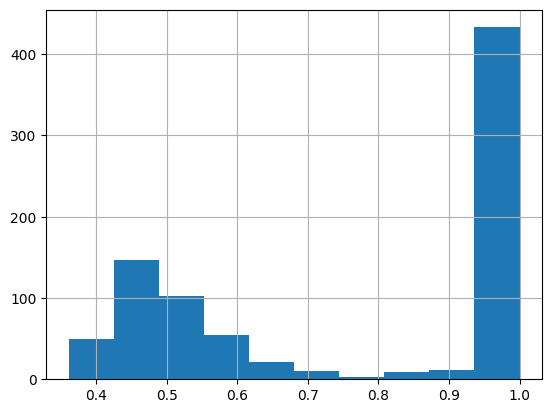

In [22]:
df_title['max_ratio'].hist()

## Example of ratios up 80%

In [23]:
df_title_up80 = df_title[df_title['max_ratio']>0.8]
print(len(df_title_up80))
df_title_up80

454


,ss_id,ss_title,max_bibkey,max_bib_title,max_ratio,up80_bibkeys,up80_bib_titles,up80_ratios
2,4bcd672218ecec70473c84f6f1cc52c64031f3e5,Continual learning strategies for cancer-indep...,Band23,Continual learning strategies for cancer-indep...,1.000000,NaN,NaN,NaN
7,41f386d38567e38132525cad9bdc7da1ad6e8f1c,Automated COVID-19 Grading With Convolutional ...,Vent21,Automated COVID-19 Grading with Convolutional ...,1.000000,NaN,NaN,NaN
9,bc6b483f9b1fa630fa4b43158b13716f1ca7497b,Domain adaptation strategies for cancer-indepe...,Band23,Continual learning strategies for cancer-indep...,0.878613,NaN,NaN,NaN
10,c661857719657aac571718e3d48cb66b8fc1e941,Prostate158 - An expert-annotated 3T MRI datas...,Adam22b,Prostate158 - An expert-annotated 3T MRI datas...,0.994595,NaN,NaN,NaN
11,1d5f65d8f721089fca1e7fac8d1ef214f12e2c23,Automated estimation of total lung volume usin...,Soga22,Automated estimation of total lung volume usin...,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1008,2cfd7ee4cb7564bc3dbfa59480c81841b58d9b35,r ecommendations for the Management of s ubsol...,Naid13,Recommendations for the management of subsolid...,0.901786,NaN,NaN,NaN
1031,c6b1c8590269a5789095eca5f28d49413045fd82,Dedicated computer-aided detection software fo...,Zels18,Dedicated computer-aided detection software fo...,1.000000,NaN,NaN,NaN
1032,db7c0e95188f028e4899642d1510c600e7fb44f2,Reasons for (non)participation in supplemental...,Lang18,Reasons for (non)participation in supplemental...,0.995951,NaN,NaN,NaN
1038,c2da52941ea09be5f3a56087d52454da941e4fb5,Surveillance of Women with the BRCA1 or BRCA2 ...,Zels17b,Surveillance of Women with the BRCA1 or BRCA2 ...,0.995885,NaN,NaN,NaN


# FILL DF_MATCHES WITH MATCHES ABOVE 80% and single match

#### pd.isna(df_title_up80['up80_bibkeys'])

#### This means that there is only a single bibkey match for this ss_id. This can still mean there are multiple ss_ids that are linked to this bibkey. Also it could be that from these doubles, one has already been linked by doi...

In [24]:
df_title_up80 = df_title[df_title['max_ratio']>0.80]
df_title_up80_single_bib = df_title_up80[pd.isna(df_title_up80['up80_bibkeys'])]
df_title_up80_multiple_bib = df_title_up80[pd.notna(df_title_up80['up80_bibkeys'])]

df_title_up80_single_bib_merge_prep = df_title_up80_single_bib[['max_bibkey', 'ss_id']].copy()

df_title_up80_single_bib_merge_prep.columns = ['bibkey', 'ss_id']
df_title_up80_single_bib_merge_prep['comment']=[None]*len(df_title_up80_single_bib_merge_prep)
df_title_up80_single_bib_merge_prep.head()

,bibkey,ss_id,comment
2,Band23,4bcd672218ecec70473c84f6f1cc52c64031f3e5,None
7,Vent21,41f386d38567e38132525cad9bdc7da1ad6e8f1c,None
9,Band23,bc6b483f9b1fa630fa4b43158b13716f1ca7497b,None
10,Adam22b,c661857719657aac571718e3d48cb66b8fc1e941,None
11,Soga22,1d5f65d8f721089fca1e7fac8d1ef214f12e2c23,None


In [25]:
df_title_up80_single_bib_merge_prep

,bibkey,ss_id,comment
2,Band23,4bcd672218ecec70473c84f6f1cc52c64031f3e5,None
7,Vent21,41f386d38567e38132525cad9bdc7da1ad6e8f1c,None
9,Band23,bc6b483f9b1fa630fa4b43158b13716f1ca7497b,None
10,Adam22b,c661857719657aac571718e3d48cb66b8fc1e941,None
11,Soga22,1d5f65d8f721089fca1e7fac8d1ef214f12e2c23,None
...,...,...,...
1008,Naid13,2cfd7ee4cb7564bc3dbfa59480c81841b58d9b35,None
1031,Zels18,c6b1c8590269a5789095eca5f28d49413045fd82,None
1032,Lang18,db7c0e95188f028e4899642d1510c600e7fb44f2,None
1038,Zels17b,c2da52941ea09be5f3a56087d52454da941e4fb5,None


# Seperatly save many bib to one/many cases

In [26]:
df_title_up80_multiple_bib.sort_values('max_bibkey').to_csv('script_data/TEMP_LOOKUP_multiple_bibkeys_maybe_multiple_ss_ids.csv', index=False)

In [27]:
ss_id_counts = Counter(df_title_up80_single_bib_merge_prep['ss_id'])
bibkey_counts = Counter(df_title_up80_single_bib_merge_prep['bibkey'])

In [28]:
doi_matched_bibkeys = df_matches[df_matches['ss_id'].notna()]['bibkey']
single_bibkey_single_ss_id = [k for k, v in bibkey_counts.items() if v==1]
single_bibkey_single_ss_id = [bibkey for bibkey in single_bibkey_single_ss_id if bibkey not in doi_matched_bibkeys]
single_bibkey_single_ss_id_doi_matched = [bibkey for bibkey in single_bibkey_single_ss_id if bibkey in doi_matched_bibkeys]
single_bibkey_multiple_ss_ids = [k for k, v in bibkey_counts.items() if v>1]
single_bibkey_multiple_ss_ids = [bibkey for bibkey in single_bibkey_multiple_ss_ids if bibkey not in doi_matched_bibkeys]
single_bibkey_multiple_ss_ids_doi_matched = [bibkey for bibkey in single_bibkey_multiple_ss_ids if bibkey in doi_matched_bibkeys]

In [29]:
for i in [single_bibkey_single_ss_id, single_bibkey_single_ss_id_doi_matched, single_bibkey_multiple_ss_ids, single_bibkey_multiple_ss_ids_doi_matched]:
    print(len(i))

355
0
30
0


# Add 1 to 1 matches

In [30]:
df_title_up80_single_bib_single_ss_id_merge_prep = df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'].isin(single_bibkey_single_ss_id)]
df_title_up80_single_bib_single_ss_id_merge_prep['comment'] = ['title matching: single bibkey, single ss_id'] * len(df_title_up80_single_bib_single_ss_id_merge_prep)

C:\Users\joeyspronck\AppData\Local\Temp\ipykernel_42784\2979579051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_up80_single_bib_single_ss_id_merge_prep['comment'] = ['title matching: single bibkey, single ss_id'] * len(df_title_up80_single_bib_single_ss_id_merge_prep)


In [31]:
matched_bibkeys = df_matches[df_matches['ss_id'].notna()]['bibkey']

In [32]:
# list(df_title_up80_single_bib_single_ss_id_merge_prep['bibkey'])

In [33]:
df_matches.iloc[df_matches['bibkey'].isin(df_title_up80_single_bib_single_ss_id_merge_prep['bibkey'])] = df_title_up80_single_bib_single_ss_id_merge_prep

# Add single bib to multiple ss_id matches

In [34]:
# df_title_up80_single_bib_multiple_ss_id_merge_prep = df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'].isin(single_bibkey_multiple_ss_ids)]
# df_title_up80_single_bib_multiple_ss_id_merge_prep['comment'] = ['single bibkey, multiple ss_id'] * len(df_title_up80_single_bib_multiple_ss_id_merge_prep)

In [35]:
# df_title_up80_single_bib_multiple_ss_id_merge_prep.sort_values('bibkey')

In [36]:
single_bib_multiple_ss_ids_data = []
for bibkey in single_bibkey_multiple_ss_ids:
    multiple_ss_ids = list(df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'] == bibkey]['ss_id'])
    ss_id_most_citations = df_ss[df_ss['ss_id'].isin(multiple_ss_ids)].sort_values('ss_citations', ascending=False).iloc[0]['ss_id']
    single_bib_multiple_ss_ids_data.append([bibkey, ss_id_most_citations, f'title matching: single bibkey with multiple_ss_ids ({multiple_ss_ids}), took the first one with most citations'])
df_title_up80_single_bib_multiple_ss_id_merge_prep = pd.DataFrame(single_bib_multiple_ss_ids_data, columns=['bibkey', 'ss_id', 'comment'])

In [37]:
df_matches.iloc[df_matches['bibkey'].isin(df_title_up80_single_bib_multiple_ss_id_merge_prep['bibkey'])] = df_title_up80_single_bib_multiple_ss_id_merge_prep

In [38]:
df_matches = pd.merge(df_bib[df_bib['type']!='string'][['bibkey', 'type', 'title', 'authors']], df_matches, on='bibkey')

In [39]:
df_matches.to_csv('script_data/TEMP_LOOKUP_matches_single_bibkey_with_none_one_or_many_ss_ids.csv')

In [40]:
df_matches.to_excel('script_data/TEMP_LOOKUP_matches_single_bibkey_with_none_one_or_many_ss_ids.xlsx')

In [41]:
df_bib

,bibkey,type,title,authors,doi,gs_citations,journal
0,AA,string,NaN,NaN,NaN,NaN,NaN
1,AAC,string,NaN,NaN,NaN,NaN,NaN
2,AACC,string,NaN,NaN,NaN,NaN,NaN
3,AAPM,string,NaN,NaN,NaN,NaN,NaN
4,AATC,string,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2782,Graa23,article,MRI image features with an evident relation to...,"van der Graaf, Jasper W and Kroeze, Robert Jan...",10.1007/s00586-023-07602-x,NaN,European Spine Journal
2783,Graa22,conference,Segmentation of vertebrae and intervertebral d...,"van der Graaf, Jasper W and van Hooff, Miranda...",10.1117/12.2611423,NaN,NaN
2784,Alves22c,inproceedings,Uncertainty-Guided Self-learning Framework for...,"Alves, Nat{\'a}lia and de Wilde, Bram",https://doi.org/10.1007/978-3-031-23911-3_11,NaN,NaN
2785,Wild23a,article,Inter-and Intra-Observer Variability and the E...,"de Wilde, Bram and Joosten, Frank and Venderin...",https://doi.org/10.3390/jimaging9030055,NaN,Journal of Imaging


In [42]:
1/0

ZeroDivisionError: division by zero

In [ ]:
multiple_ss_ids

In [ ]:
df_ss[df_ss['ss_id'].isin(multiple_ss_ids)].sort_values('ss_citations', ascending=False).iloc[0]['ss_id']

In [ ]:
single_bib_multiple_ss_ids_data

In [ ]:
list(df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'] == bibkey]['ss_id'])

In [ ]:
1/0

In [ ]:
df_matches.iloc[df_matches['bibkey'].isin(df_df_title_up80_single_merge_prep['bibkey'])] = df_df_title_up80_single_merge_prep

In [ ]:
bibkeys_single_title_match = [k for k, v in bibkey_counts.items() if v==1]

In [ ]:
df_df_title_up80_single_merge_prep[df_df_title_up80_single_merge_prep['bibkey']=='Altu20']

In [ ]:
df_matches[df_matches['bibkey']=='Altu20']

In [ ]:
df_matches.loc[df_matches['bibkey'].isin(df_df_title_up80_single_merge_prep['bibkey'])]

In [ ]:
df_df_title_up80_single_merge_prep

In [ ]:
df_matches.iloc[df_matches['bibkey'].isin(df_df_title_up80_single_merge_prep['bibkey'])] = df_df_title_up80_single_merge_prep

### With multiple matches above 80%

In [ ]:
df_title_up80_mult = df_title_up80[df_title_up80['up80_ratios'].notna()]
print(len(df_title_up80_mult))
df_title_up80_mult.head()

### Example with same name matches

In [ ]:
bibkey = 'Anto21'
df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]

In [ ]:
temp_ss_ids = list(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['ss_id'])
temp_ss_ids

In [ ]:
for temp_ss_id in temp_ss_ids:
    display(df_ss[df_ss['ss_id']==temp_ss_id])
    print(df_ss[df_ss['ss_id']==temp_ss_id].iloc[0]['ss_citations'])

In [ ]:
title_match_bibkeys = literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey].iloc[0]['up80_bibkeys'])
title_match_bibkeys

In [ ]:
df_bib[df_bib['bibkey'].isin(title_match_bibkeys)]

Above we see one is arxiv and one is journal

### Example with different matches

In [ ]:
bibkey = 'Vos12a'

In [ ]:
literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['up80_bibkeys'].item())

In [ ]:
literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['up80_bib_titles'].item())

In [ ]:
literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['up80_ratios'].item())

# Loop over cases with multiple matche ratios over 80% 

In [ ]:
def flatten(nested_list):
    return [item for sublist in nested_list for item in (flatten(sublist) if isinstance(sublist, list) else [sublist])]

In [ ]:
for idx, row in df_title_up80_mult.iterrows():
    bibkey = row['max_bibkey']
    bibkey_matches = df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]
    display(bibkey_matches)
    unique_bibkeys = pd.unique(flatten([literal_eval(items) for items in bibkey_matches['up80_bibkeys']]))
    unique_ss_ids = list(bibkey_matches['ss_id'])
    
    print('SS_IDs:')
    for ss_id in unique_ss_ids:
        print('\t\t\t', ss_id)
        print('\n', df_ss[df_ss['ss_id'] == ss_id].iloc[0])
    
    print('\n\nBIBKEYs:')
    for bibkey in unique_bibkeys:
        print('\t\t\t', bibkey)
        print('\n', df_bib[df_bib['bibkey'] == bibkey].iloc[0])

# Validate matches

In [ ]:
# df_bib
# df_ss
# df_doi
# df_title

In [ ]:
len(df_bib)

In [ ]:
df_unmatched = df_bib.copy()
df_unmatched = df_unmatched[~df_unmatched['bibkey'].isin(df_doi['bibkey'])]

In [ ]:
len(df_doi)

In [ ]:
len(df_bib) - len(df_unmatched)